<a href="https://colab.research.google.com/github/fasmina-nasar/BreastCancerReccurence-/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD,Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report,confusion_matrix

Read Dataset

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datasets(deep learning)/breast-cancer.csv')
data.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


Shuffling Dataset

In [ ]:
data=data.sample(frac=1,random_state=10)

In [ ]:
data

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,deg-malig,Breast,Breast-quad,Irradiat
121,no-recurrence-events,50-59,ge40,15-19,0-2,no,2,right,right_up,no
268,recurrence-events,30-39,premeno,35-39,0-2,no,3,left,left_low,no
61,no-recurrence-events,40-49,premeno,10-14,0-2,no,1,right,right_low,no
131,no-recurrence-events,40-49,premeno,40-44,3-5,yes,3,right,left_up,yes
232,recurrence-events,30-39,premeno,30-34,3-5,no,3,right,left_up,yes
...,...,...,...,...,...,...,...,...,...,...
156,no-recurrence-events,50-59,ge40,25-29,3-5,yes,3,right,left_up,no
123,no-recurrence-events,50-59,ge40,30-34,0-2,no,1,right,left_low,no
15,no-recurrence-events,60-69,lt40,30-34,0-2,no,1,left,left_low,no
125,no-recurrence-events,70-79,ge40,10-14,0-2,no,2,left,central,no


In [ ]:
data=data.replace("?",np.nan)

# Replace the '?' by np.nan so that we can preprocess it.

Checking for missing values

In [ ]:
data.isnull().any()

Class          False
 Age           False
 Menopause     False
Tumor-size     False
Inv-nodes      False
Node-caps       True
deg-malig      False
Breast         False
Breast-quad     True
Irradiat       False
dtype: bool

Replace missing values with most frequent strategy using Simple Imputer

In [ ]:
imputer=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')

In [ ]:
data['Node-caps']=imputer.fit_transform(data[['Node-caps']])
data['Breast-quad']=imputer.fit_transform(data[['Breast-quad']])

In [ ]:
data.isnull().any()

Class          False
 Age           False
 Menopause     False
Tumor-size     False
Inv-nodes      False
Node-caps      False
deg-malig      False
Breast         False
Breast-quad    False
Irradiat       False
dtype: bool

Info of dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 121 to 265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1    Age         286 non-null    object
 2    Menopause   286 non-null    object
 3   Tumor-size   286 non-null    object
 4   Inv-nodes    286 non-null    object
 5   Node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   Breast       286 non-null    object
 8   Breast-quad  286 non-null    object
 9   Irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 24.6+ KB


In [ ]:
features=list(data.columns)
features

['Class',
 ' Age',
 ' Menopause',
 'Tumor-size',
 'Inv-nodes',
 'Node-caps',
 'deg-malig',
 'Breast',
 'Breast-quad',
 'Irradiat']

check unique values in corresponding features

In [ ]:
for column in data:
  print(f"{column} : {data[column].unique()}")

Class : ['no-recurrence-events' 'recurrence-events']
 Age : ['50-59' '30-39' '40-49' '60-69' '70-79' '20-29']
 Menopause : ['ge40' 'premeno' 'lt40']
Tumor-size : ['15-19' '35-39' '10-14' '40-44' '30-34' '20-24' '50-54' '0-4' '25-29'
 '45-49' '5-9']
Inv-nodes : ['0-2' '3-5' '9-11' '6-8' '15-17' '12-14' '24-26']
Node-caps : ['no' 'yes']
deg-malig : [2 3 1]
Breast : ['right' 'left']
Breast-quad : ['right_up' 'left_low' 'right_low' 'left_up' 'central']
Irradiat : ['no' 'yes']


LabelEncode the object type data

In [ ]:
label_encoder=LabelEncoder()
data['Class']=label_encoder.fit_transform(data['Class'])
data[' Age']=label_encoder.fit_transform(data[' Age'])
data[' Menopause']=label_encoder.fit_transform(data[' Menopause'])
data['Tumor-size']=label_encoder.fit_transform(data['Tumor-size'])
data['Inv-nodes']=label_encoder.fit_transform(data['Inv-nodes'])
data['Node-caps']=label_encoder.fit_transform(data['Node-caps'])
data['deg-malig']=label_encoder.fit_transform(data['deg-malig'])
data['Breast']=label_encoder.fit_transform(data['Breast'])
data['Breast-quad']=label_encoder.fit_transform(data['Breast-quad'])
data['Irradiat']=label_encoder.fit_transform(data['Irradiat'])

In [ ]:
data

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,deg-malig,Breast,Breast-quad,Irradiat
121,0,3,0,2,0,0,1,1,4,0
268,1,1,2,6,0,0,2,0,1,0
61,0,2,2,1,0,0,0,1,3,0
131,0,2,2,7,4,1,2,1,2,1
232,1,1,2,5,4,0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...
156,0,3,0,4,4,1,2,1,2,0
123,0,3,0,5,0,0,0,1,1,0
15,0,4,1,5,0,0,0,0,1,0
125,0,5,0,1,0,0,1,0,0,0


In [ ]:
for column in data:
  print(f"{column} : {data[column].unique()}")

Class : [0 1]
 Age : [3 1 2 4 5 0]
 Menopause : [0 2 1]
Tumor-size : [ 2  6  1  7  5  3 10  0  4  8  9]
Inv-nodes : [0 4 6 5 2 1 3]
Node-caps : [0 1]
deg-malig : [1 2 0]
Breast : [1 0]
Breast-quad : [4 1 3 2 0]
Irradiat : [0 1]


Visualizing Dataset

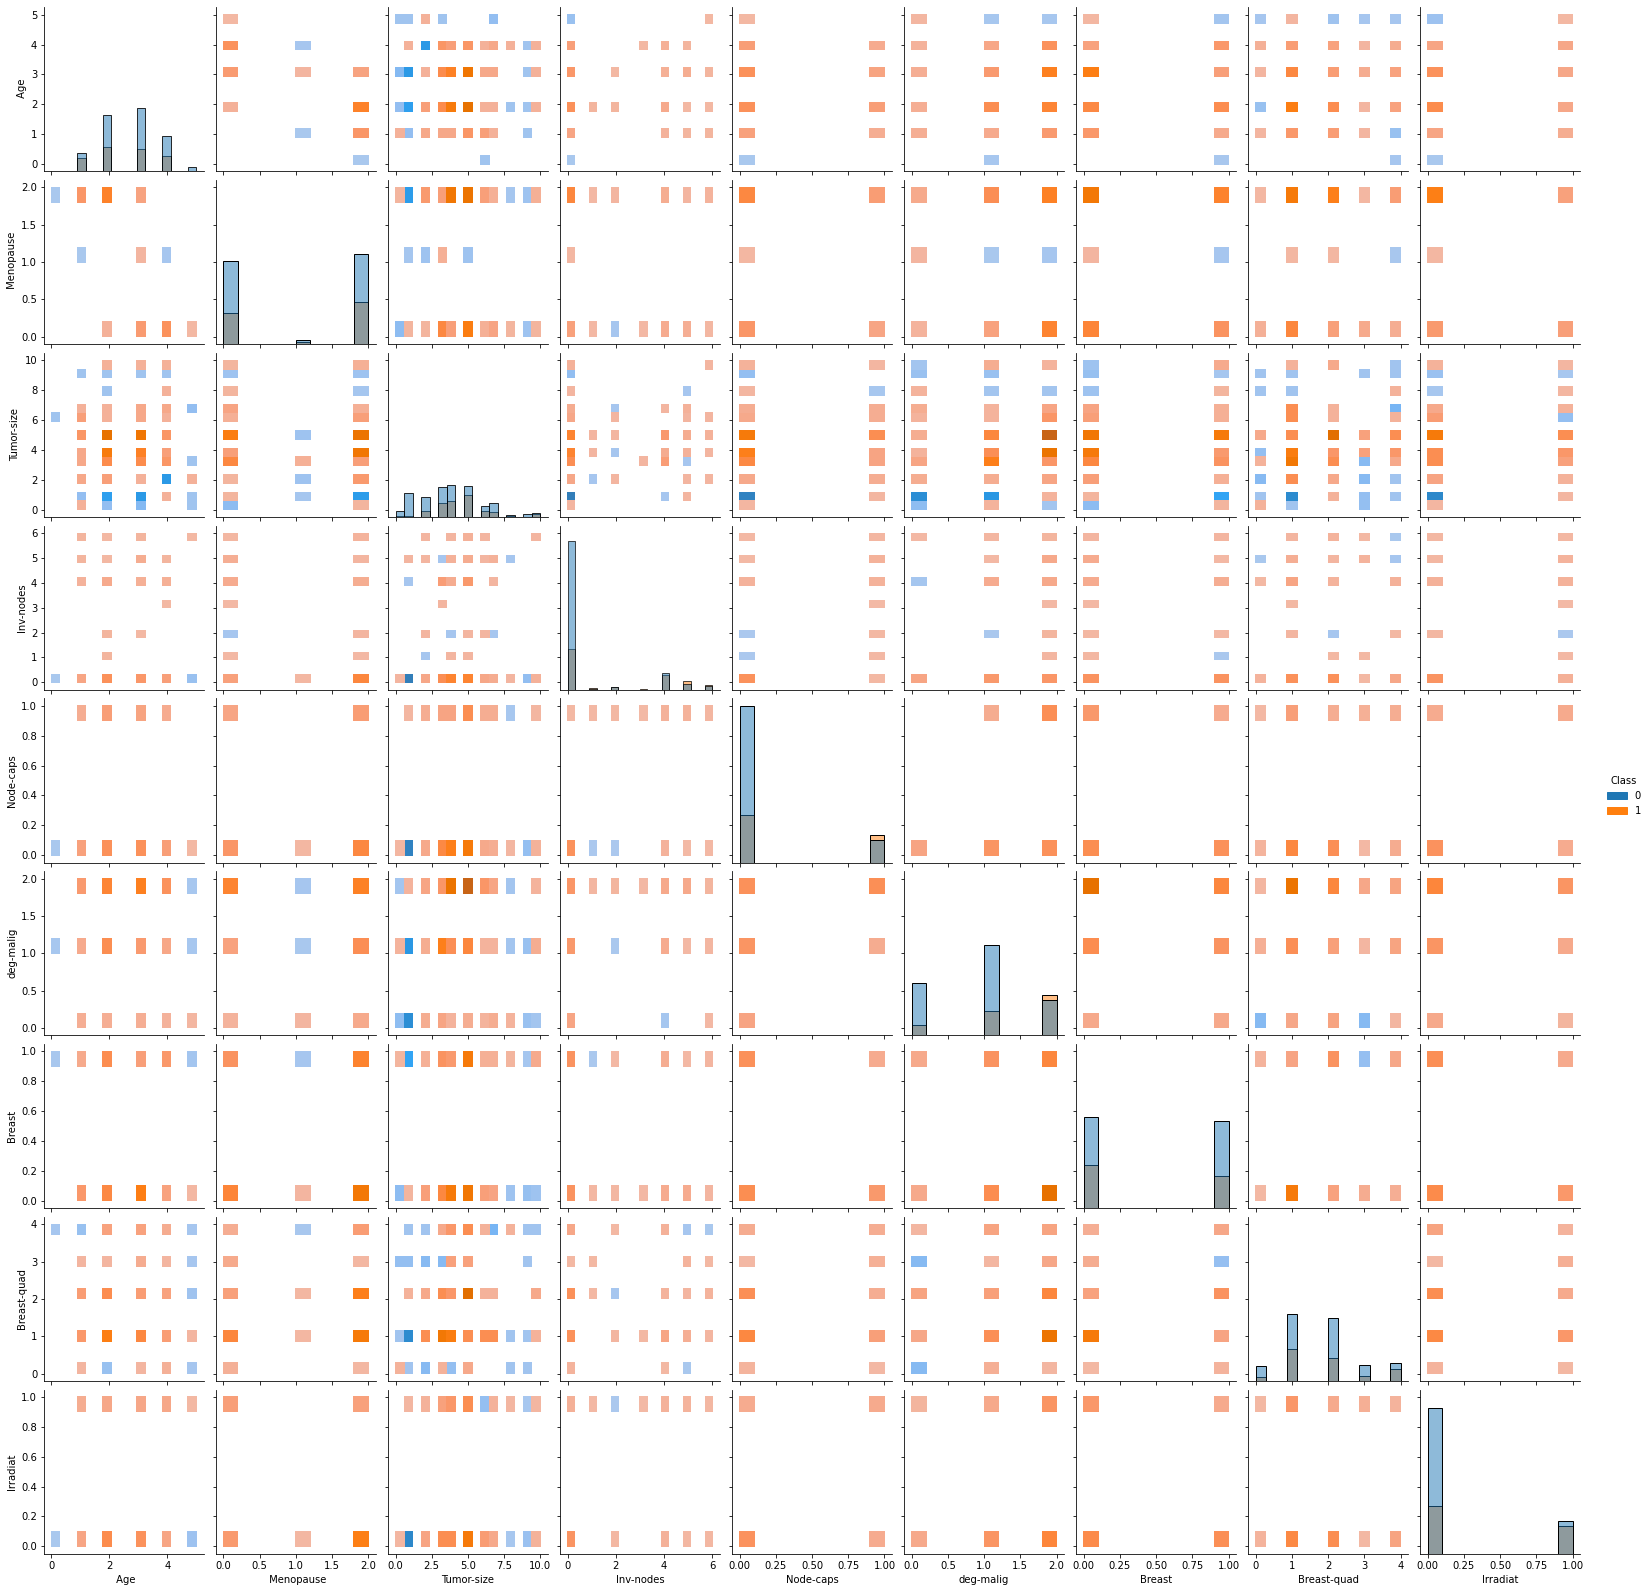

In [ ]:
plot=sns.pairplot(data,hue='Class',kind='hist')

Split Dataset into Training nd Testing

In [ ]:
X=data.drop('Class',axis=1)
y=data['Class']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
print(X_train.shape,X_test.shape)

(228, 9) (58, 9)


Build model

In [ ]:
model=Sequential()

model.add(Dense(30,input_dim=9,activation='relu',kernel_initializer='uniform'))

model.add(Dense(15,activation='relu',kernel_initializer='uniform'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                300       
                                                                 
 dense_5 (Dense)             (None, 15)                465       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


Training the model

In [ ]:
training_history=model.fit(X_train,y_train,epochs=100,batch_size=10,validation_data=(X_test,y_test))

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 0.6837 - accuracy: 0.6798 - val_loss: 0.6653 - val_accuracy: 0.7414
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6544 - accuracy: 0.6930 - val_loss: 0.6161 - val_accuracy: 0.7414
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6242 - accuracy: 0.6930 - val_loss: 0.5794 - val_accuracy: 0.7414
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6021 - accuracy: 0.6930 - val_loss: 0.5682 - val_accuracy: 0.7759
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5876 - accuracy: 0.7193 - val_loss: 0.5591 - val_accuracy: 0.7586
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5751 - accuracy: 0.7412 - val_loss: 0.5533 - val_accuracy: 0.7414
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.7281 - val_loss: 0.5518 - val_accuracy: 0.7414
Epoch 8/100


In [ ]:
hist=training_history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
hist['val_accuracy'][-1]

0.7586206793785095

Comparing the validation loss and training loss by visualizing it

Text(0, 0.5, 'loss')

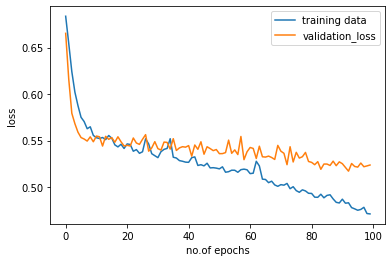

In [ ]:
plt.plot(hist['loss'],label='training data')
plt.plot(hist['val_loss'],label='validation_loss')
plt.legend()
plt.xlabel('no.of epochs')
plt.ylabel('loss')

Comparing the validation accuracy and training accuracy by visualizing it

Text(0, 0.5, 'accuracy')

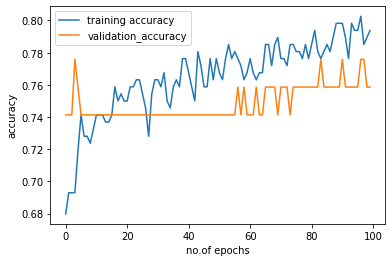

In [ ]:
plt.plot(hist['accuracy'],label='training accuracy')
plt.plot(hist['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.xlabel('no.of epochs')
plt.ylabel('accuracy')

Predicting the model

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([[0.0709292 ],
       [0.08317181],
       [0.15762544],
       [0.0709292 ],
       [0.40934289],
       [0.02889067],
       [0.0635238 ],
       [0.18182084],
       [0.180415  ],
       [0.08441204],
       [0.29610834],
       [0.77914643],
       [0.90725625],
       [0.36129373],
       [0.4044997 ],
       [0.25253946],
       [0.902601  ],
       [0.11466062],
       [0.21813777],
       [0.2545148 ],
       [0.286192  ],
       [0.30432564],
       [0.19271496],
       [0.38066986],
       [0.03358239],
       [0.2658554 ],
       [0.26950786],
       [0.3036454 ],
       [0.04092529],
       [0.3110737 ],
       [0.35448873],
       [0.13036594],
       [0.10510731],
       [0.08121049],
       [0.17218915],
       [0.37982994],
       [0.05849472],
       [0.6683968 ],
       [0.28966016],
       [0.21606454],
       [0.28049275],
       [0.3108331 ],
       [0.16571355],
       [0.82031274],
       [0.32317865],
       [0.57199746],
       [0.09639642],
       [0.334

convert the probability values greater than 0.5 to 1 and less than 0.5 to 0

In [ ]:
y_pred_classes=(y_pred>0.5).astype('int')
y_pred_classes

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1]])

In [ ]:
y_pred_classes_with_labels= ['reccurence event' if (item>0.5).astype('int') else 'non reccurence events' for item in y_pred]
y_pred_classes_with_labels

['non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'reccurence event',
 'reccurence event',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'reccurence event',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'non reccurence events',
 'reccurence event',
 'non reccurence events',
 'non 

Classification Report

In [ ]:
Classification_report=print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        43
           1       0.56      0.33      0.42        15

    accuracy                           0.76        58
   macro avg       0.68      0.62      0.63        58
weighted avg       0.73      0.76      0.74        58



Confusion Matrix

In [ ]:
Confusion_matrix=print(confusion_matrix(y_test,y_pred_classes))

[[39  4]
 [10  5]]


predicting model by providing random data

In [ ]:
y_pred[57]

array([0.88577425], dtype=float32)

In [ ]:
y_pred_classes[57]

array([1])